# Topic 10: Inequalities and Limit Theorems

## Inequalities

The following code plots Markov's and Chebyshev's inequalities. First import pylab, which in turn will import numpy and matplotlib.

In [5]:
%pylab inline
import ipywidgets as widgets
import matplotlib.pyplot as plt 
from math import sqrt,exp


Populating the interactive namespace from numpy and matplotlib


D:\AnacondaNavigator\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sqrt', 'exp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

The function `plot_markov_chebyshev` plots the Markov and Chebyshev bounds. You can use the interactive widgets to control the mean and standard deviation. Observe that for $a$ close to the mean, Markov's inequality is stronger, but as $a$ grows, Chebyshev's inequality decreases quadratically and becomes stronger.   

In [7]:
@widgets.interact(mu=(0.5,20),sig=(0.5,20), continuous_update = False)
def plot_markov_chebyshev(mu, sig):

    a_min = mu
    a_max = min(mu*20,sig*10)

    a = np.linspace(a_min, a_max, 10001)
    plt.plot(a, mu/a, 'b', linewidth=3.0, label='Markov $\mu/a$')

    b_min = mu+sig
    b = np.linspace(b_min, a_max, 10001)
    plt.plot(b, (sig/(b-mu))**2, 'r', linewidth=3.0, label='Chebyshev $\sigma^2/(a-\mu)^2$')
    plt.plot([mu,mu],[0,1.1],'b',
             [mu+sig,mu+sig],[0,1.1],'r')
    
    plt.title('Markov and Chebyshev bounds on $P(X\geq a)$ for $\mu=$%0.1f and $\sigma=$%0.1f' %(mu,sig), fontsize = 20)
    plt.xlabel('a')
    plt.ylabel('Probability bounds')
    plt.legend()
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=10.25, description='mu', max=20.0, min=0.5), FloatSlider(value=10.25, …

## Law of Large Numbers

We demonstrate the Law of Large Numbers by plotting the distribution of sample means.

The following code calculates and plots the probability distribution  function (PDF) of the sample mean
$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i.$$

### Uniform distributions

The $X_i$ follow an i.i.d. uniform distribution on interval $[a,b]$
$$f_{X_i}(x)=\begin{cases}
\frac{1}{b-a} & a\le x\le b\\
0 & \text{otherwise}
\end{cases}$$

We generate sliders to control the input to the function, followed by the actual simulation. 

$[a,b]$ is the range of the uniform distirbution, shown in blue, and its mean $x=\mu=E[X_i]$
is shown in green. $n$ is the number of variables that get averaged and the pdf of the average is shown in blue. For example, if $n=5$ and $s=1000$ then you generate 1000 samples, where each sample is the mean of 5 samples from the uniform distribution. 

Observe that as you increase $n$, the distribution of the mean approaches a spike at $\mu$. And when you increase $s$ the simulation histogram approaches the actual distribution. 


interactive(children=(FloatRangeSlider(value=(2.0, 8.0), continuous_update=False, description='[a, b]', max=9.…

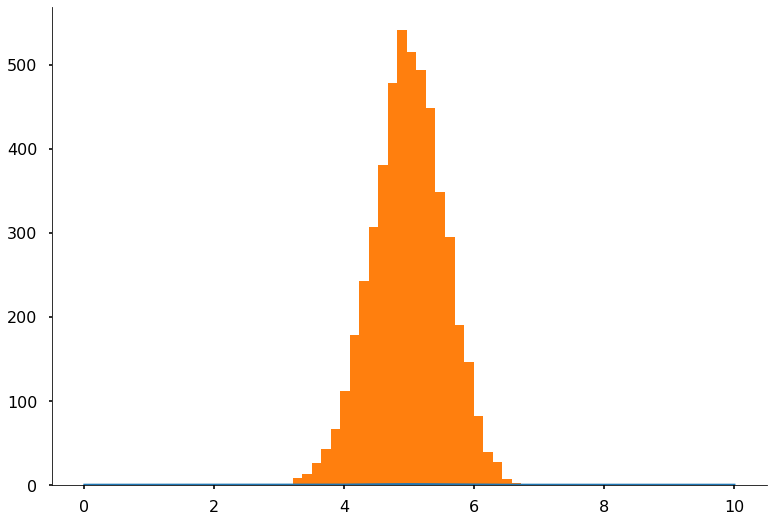

In [8]:
# defining interactive widget object
w=widgets.FloatRangeSlider(description = "[a, b]", 
                           value=[2, 8], 
                           min=0.02,
                           max=9.98,
                           step=0.01,
                           continuous_update = False)


# Generate samples of emphirical mean of k uniform distribution on [a,b]
def generate_uniform_counts(a,b,k,n):
    X= random.uniform(a,b,[k,n])  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/k
    return S

def uniform_plot_hist(s,k,h):
    a,b=s
    if h>0:
        n=h
        counts=generate_uniform_counts(a,b,k,n)
        hist(counts,bins=30,normed=True,label="Histogram of mean values")
        xlim([0,10])
        plot([(a+b)/2, (a+b)/2], [0, 1], 'g--', linewidth = 2.0,label="Mean of uniform distribution")


# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
@widgets.interact(s=w,n=(1,20),h=(1,10000))
def uniform_mean_pdf(s,n,h):
    a,b = s 
    d = 10.0/1000;
    x=linspace(0.01,10,1000)
    close()
    if a<b:
        y=(1.0*(x>=a))*(1.0*(x<=b))/(b-a)
        z=y
        for j in range(2,n+1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z=[0,] + convolve(y,t).tolist()
            z=[i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        plot(x, z, label="Distribution of Mean")
        uniform_plot_hist(s,n,h)
        title('PDF and histogram of $\overline{X}_n$ with n=%d, s=%d'%(n,h), fontsize = 20)
        xlabel('$\overline{x}_n$')
        ylabel('$f_{\overline{X}_n}(x)$')
        plt.ylim([0,1.1])
        plt.legend()


### Exponential distribution

Again we plot the probability distribution function (PDF) of sample mean
$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i.$$
However, now the $X_i$ follow an i.i.d. exponential distribution with parameter $\lambda$
$$f_{X_i}(x)=\begin{cases}
\lambda e^{-\lambda x} & x\ge 0\\
0 & x<0
\end{cases}$$
The green line denotes $x=E[X_i]$.

In [9]:
from math import exp,factorial
# Generate the sample of emphirical mean of k exponential distribution with parameter beta
def generate_exponential_counts(lam,k,n):
    X= random.exponential(1.0/lam,[k,n])  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/k
    return S

def exp_plot_hist(lam,k,h):
    n=h
    if h>0:
        counts=generate_exponential_counts(lam,k,n)
        hist(counts,bins=30,normed=True,label="Histogram of mean values");

# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~Exp_{lam}
def exponential_mean_pdf(lam,n,h):
    d = 5.0/1000;
    x=linspace(0.01,5,1000)
    z=[(lam**n)*((i*(n))**(n-1))*exp(-lam*(i*(n)))/(factorial(n-1))*(n) for i in x]
    close()
    plot(x, z,label="Distribution of mean")
    plot([1.0/lam, 1.0/lam], [0, 2], 'g--', linewidth = 2.0,label="Mean of exponential distribution")
    exp_plot_hist(lam,n,h)
    title('PDF and histogram of $\overline{X}_n$ with n=%d, s=%d'%(n,h))
    xlabel('$x$')
    ylabel('$f_{\overline{X}_n}(x)$')
    plt.legend()

Next some sliders to control the input, followed by the actual simulation. 

$\lambda$ is the parameter of the exponential distirbution, shown in blue, and its mean $x=1/\lambda=E[X_i]$
is shown in green. $n$ is the number of variables that get averaged and the pdf of the average is shown in blue. For example, if $n=5$ and $s=1000$ then you generate 1000 samples, where each sample is the mean of 5 samples from the exponential distribution. 

Observe that as you increase $n$, the distribution of the mean approaches a spike at $\mu$. And when you increase $s$ the simulation histogram approaches the actual distribution. 


In [10]:
widgets.interact(
    exponential_mean_pdf,
    lam=widgets.FloatSlider(min=1, max=4,description='$\lambda$:', step=0.1, value=2),
    n=widgets.IntSlider(min=1, max=20,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))

interactive(children=(FloatSlider(value=2.0, description='$\\lambda$:', max=4.0, min=1.0), IntSlider(value=1, …

<function __main__.exponential_mean_pdf(lam, n, h)>

## Central Limit Theorem
### Uniform Distribution

This section demonstrates the Central Limit Theorem by comparing
$$S_n=\frac{1}{\sqrt{n}}\sum_{i=1}^n \left({X_i-\mu}\right)$$
with the normal distribution $\mathcal{N}(0,\sigma^2)$
where $X_i$ are iid random variables and $\mu=E[X_i]$, $\sigma^2=V(X_i)$.

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when $X_i$ follows uniform distribution on $[a,b]$. Observe how quickly the distribution of $S_n$ converges to normal. 

In [11]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
def uniform_sample_counts(a,b,k,n):
    X= random.uniform(a-(a+b)/2,b-(a+b)/2,[k,n])  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/sqrt(k)
    return S

def uniform_plot_hist(s,k,h):
    a=s[0]
    b=s[1]
    if h>0:
        n=h
        counts=uniform_sample_counts(a,b,k,n)
        hist(counts,bins=40,normed=1,label="Histogram of emphirical means");
    
def uniform_mean_pdf(s,n,h):
    a = s[0]
    b = s[1]
    d = 10.0/1000;
    x=linspace(-4.99,5,1000)
    if a<b:
        y=(1.0*(x>=(a-b)/2))*(1.0*(x<=(b-a)/2))/(b-a)
        z=y
        for j in range(2,n+1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z=[0,] + convolve(y,t).tolist()
            z=[i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        sc = int(n/sqrt(n))
        rem = n/sqrt(n)-sc
        z = [item/(rem+sc) for item in z for i in range(sc+random.binomial(1,rem))]
        x = linspace(-d*len(z)/2,d*len(z)/2,len(z))
        close()
        plot(x, z,label="Distribution of the mean")
        xlim([-5,5])
        title('PDF and histogram of ${Z}_n$ with n=%d'%n)
        xlabel('$x$')
        ylabel('$f_{S_n}(x)$')
        
        var = (b-a)**2/12
        p = linspace(-5,5,1000)
        q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
        plot(p,q,label="Gaussian distribution")
        uniform_plot_hist(s,n,h)
        xlim([-5,5])
        plt.legend()
        grid()
        
        
w=widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[2, 8],
    min=0.02,
    max=9.98,
    step=0.01,
    continuous_update = False)
widgets.interact(
    uniform_mean_pdf,
    s=w,
    n=widgets.IntSlider(min=1, max=10,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='samples :', step=50, value=0))

interactive(children=(FloatRangeSlider(value=(2.0, 8.0), continuous_update=False, description='[a, b]', max=9.…

<function __main__.uniform_mean_pdf(s, n, h)>

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when the $X_i$ follow exponential distribution with parameter $\lambda$. Again observe the high convergence speed.

In [12]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~Exp_{lam}
from math import exp,factorial,sqrt
def exp_sample_counts(lam,k,n):
    X= random.exponential(1.0/lam,[k,n])-1.0/lam  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/sqrt(k)
    return S

def exp_plot_hist(lam,k,h):
    lam
    if h>0:
        n=h
        counts=exp_sample_counts(lam,k,n)
        hist(counts,bins=40,normed=1,label="Histogram of emphirical means")
    
def exponential_mean_pdf(lam,n,h):
    d=0.01
    x=linspace(d,5,500)
    z=[(lam**n)*((i*sqrt(n))**(n-1))*exp(-lam*(i*sqrt(n)))/(factorial(n-1))*sqrt(n) for i in x]
    x=linspace(d-n/(sqrt(n)*lam),5-n/(sqrt(n)*lam),500)
    close()
    plot(x, z, label="Distribution of the Mean")
    #plot([1.0/lam, 1.0/lam], [0, 2], 'g--', linewidth = 2.0)
    title('PDF and histogram of ${Z}_n$ with n=%d $\lambda$=%1.2f'%(n,lam), fontsize = 20)
    xlabel('$x$', fontsize = 20)
    ylabel('$f_{S_n}(x)$', fontsize = 20)
    
    var = 1.0/(lam**2)
    p = linspace(-5,5,1000)
    q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
    plot(p,q,label="Gaussian distribution")
    xlim([-5,5])
    ylim([0,1.3])
    grid()
    
    exp_plot_hist(lam,n,h)

widgets.interact(
    exponential_mean_pdf,
    lam=widgets.FloatSlider(min=1, max=3,description='$\lambda$:', step=0.1, value=2),
    n=widgets.IntSlider(min=1, max=30,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))

interactive(children=(FloatSlider(value=2.0, description='$\\lambda$:', max=3.0, min=1.0), IntSlider(value=1, …

<function __main__.exponential_mean_pdf(lam, n, h)>